In [1]:
%matplotlib notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, RNN

from keras import optimizers
from scipy.io import loadmat
from skimage.transform import resize
from sklearn import preprocessing

fluid = loadmat('/Users/senlin/Downloads/DATA-2/FLUIDS/CYLINDER_ALL.mat')
snapshots = fluid['VORTALL']
m = int(fluid['m'])
n = int(fluid['n'])

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
snapshots = scaler.fit_transform(snapshots)

In [3]:
P = .5
train_size = int(snapshots.shape[1] * P)
test_size = snapshots.shape[1] - train_size
train, test = snapshots[:,0:train_size], snapshots[:,train_size:snapshots.shape[1]]

In [4]:
trainX, trainY = train[:,0:train_size-1].T, train[:,1:train_size].T
testX, testY = test[:,0:test_size-1].T, test[:,1:test_size].T

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
#### too slow to run on CPU
model = Sequential()
model.add(LSTM(trainX.shape[2], input_shape=(1, trainX.shape[2])))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=10)

In [ ]:
model = Sequential()
model.add(Dense(trainX.shape[2], activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [47]:
model = Sequential()
model.add(RNN(trainX.shape[2], activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

89351

In [5]:
U,S,VT = np.linalg.svd(snapshots,full_matrices = False)

In [6]:
np.where(np.cumsum(S/np.sum(S))<0.99)

(array([0, 1, 2, 3, 4, 5]),)

In [11]:
latent = np.diag(S[0:6])@VT[0:6,]

In [41]:
P = .5
train_size = int(latent.shape[1] * P)
test_size = latent.shape[1] - train_size
train, test = latent[:,0:train_size], latent[:,train_size:latent.shape[1]]

In [42]:
trainX_l, trainY_l = train[:,0:train_size-1].T, train[:,1:train_size].T
testX_l, testY_l = test[:,0:test_size-1].T, test[:,1:test_size].T

trainX_l = np.reshape(trainX_l, (trainX_l.shape[0], 1, trainX_l.shape[1]))
testX_l = np.reshape(testX_l, (testX_l.shape[0], 1, testX_l.shape[1]))

In [60]:
# LSTM 
model = Sequential()
model.add(LSTM(trainX_l.shape[2],return_sequences=True))
model.add(LSTM(trainX_l.shape[2]))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX_l, trainY_l, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
74/74 - 3s - loss: 3763.6816 - 3s/epoch - 41ms/step
Epoch 2/100
74/74 - 0s - loss: 3761.7048 - 196ms/epoch - 3ms/step
Epoch 3/100
74/74 - 0s - loss: 3760.1301 - 172ms/epoch - 2ms/step
Epoch 4/100
74/74 - 0s - loss: 3755.2258 - 161ms/epoch - 2ms/step
Epoch 5/100
74/74 - 0s - loss: 3748.0447 - 154ms/epoch - 2ms/step
Epoch 6/100
74/74 - 0s - loss: 3739.4070 - 154ms/e

In [55]:
## NN
model = Sequential()
model.add(Dense(trainX_l.shape[2], input_shape=(1, trainX_l.shape[2])))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX_l, trainY_l, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
74/74 - 0s - loss: 3117.4375 - 315ms/epoch - 4ms/step
Epoch 2/100
74/74 - 0s - loss: 2223.7446 - 73ms/epoch - 986us/step
Epoch 3/100
74/74 - 0s - loss: 1564.6361 - 78ms/epoch - 1ms/step
Epoch 4/100
74/74 - 0s - loss: 1083.0909 - 74ms/epoch - 993us/step
Epoch 5/100
74/74 - 0s - loss: 737.3288 - 73ms/epoch - 984us/step
Epoch 6/100
74/74 - 0s - loss: 492.8101 - 75ms/

In [39]:
reconst_pred = U[:,0:6]@model.predict(testX_l).T.reshape(-1,75)
MSE = np.mean((reconst_pred - testY.T)**2)
MSE

1.8440886899809947e-05

<IPython.core.display.Javascript object>


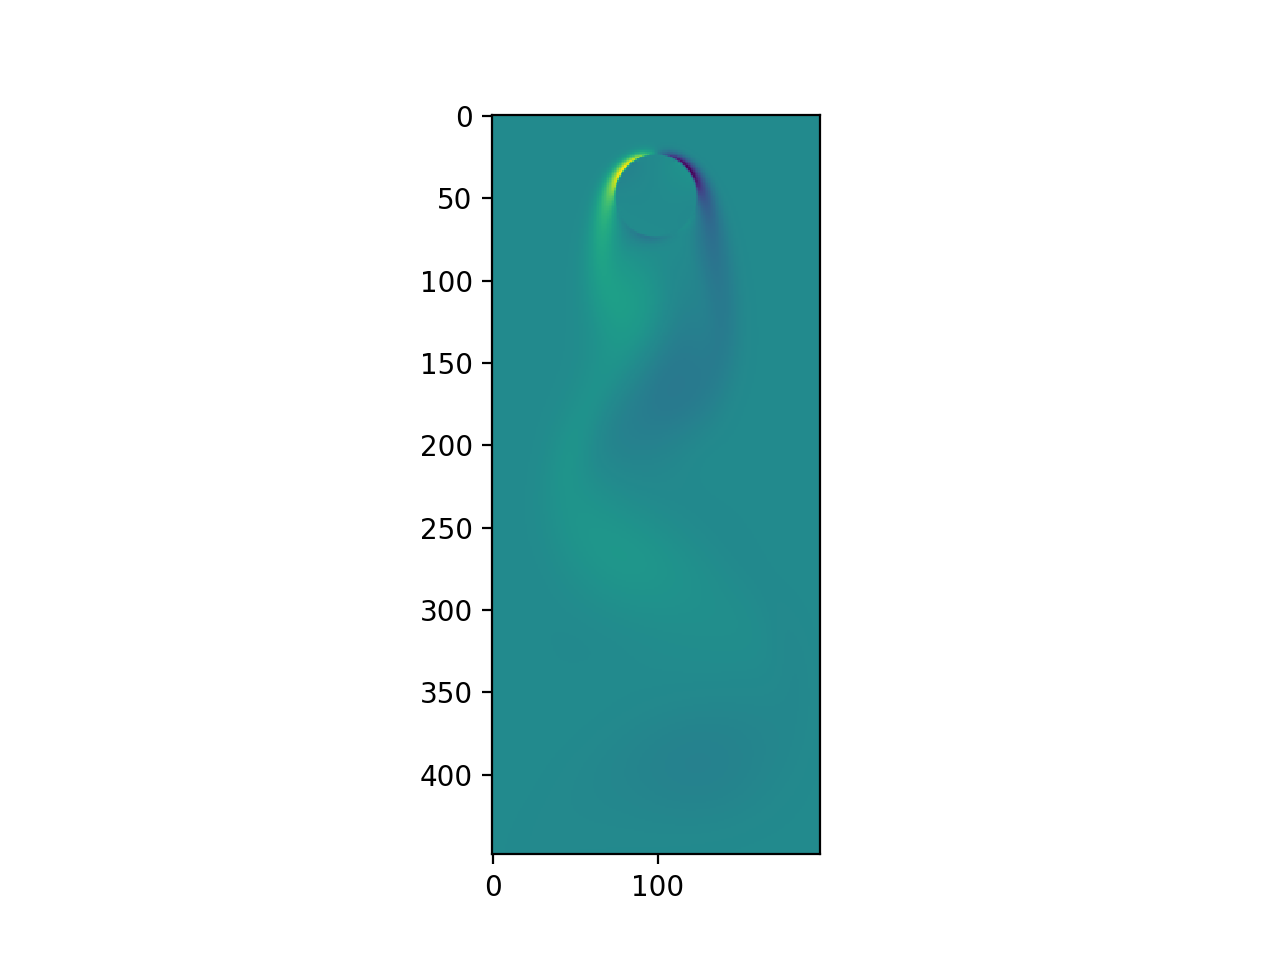

In [36]:
plt.figure()
plt.imshow(reconst_pred[:,0].reshape(n,m))

<IPython.core.display.Javascript object>


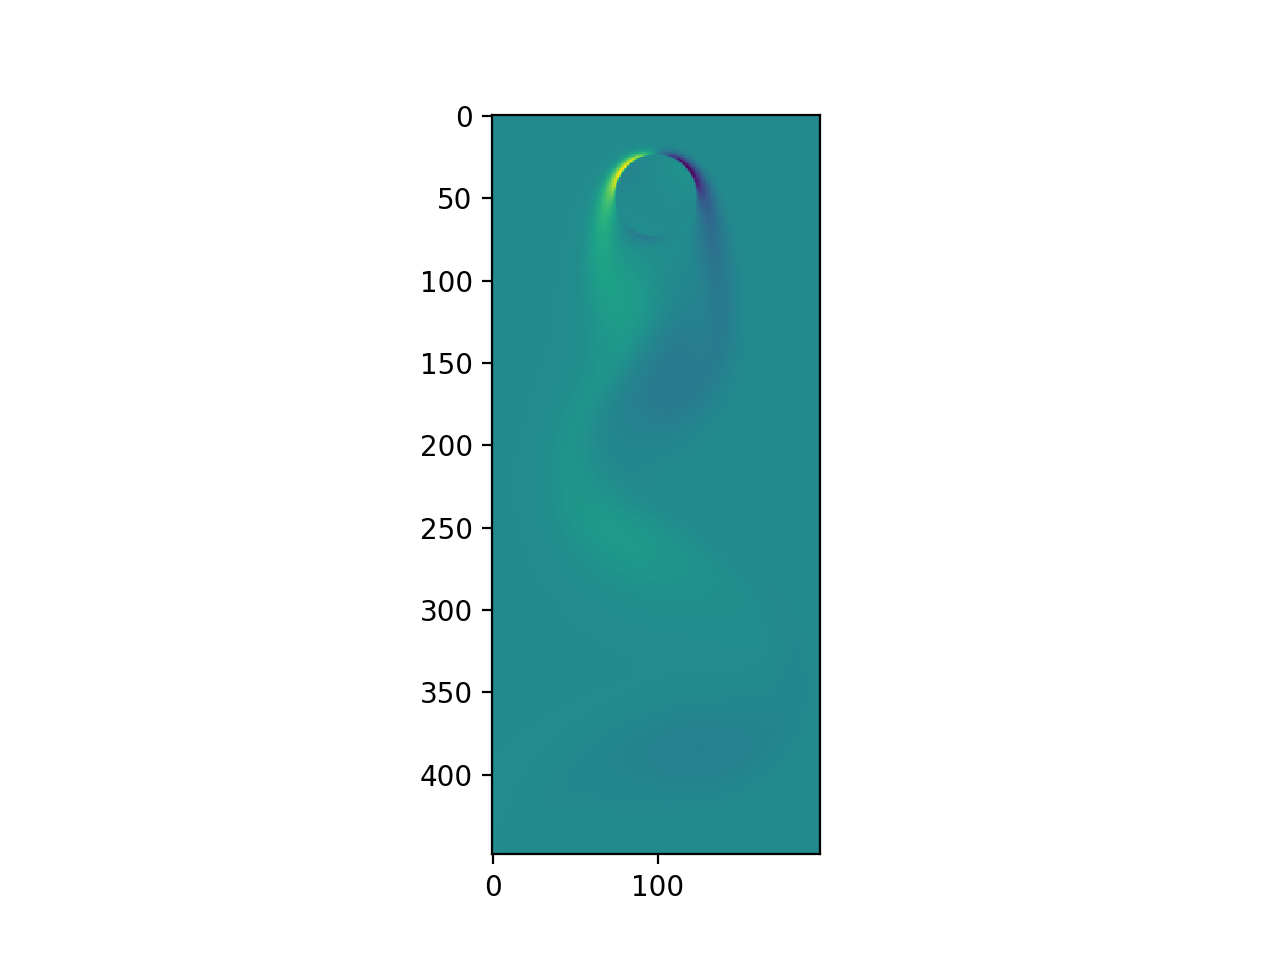

In [38]:
plt.figure()
plt.imshow(testX[0,:].T.reshape(n,m))